# Neoclassical transport calculations for axisymmetric plasmas

## `SymbolicEquilibrium`

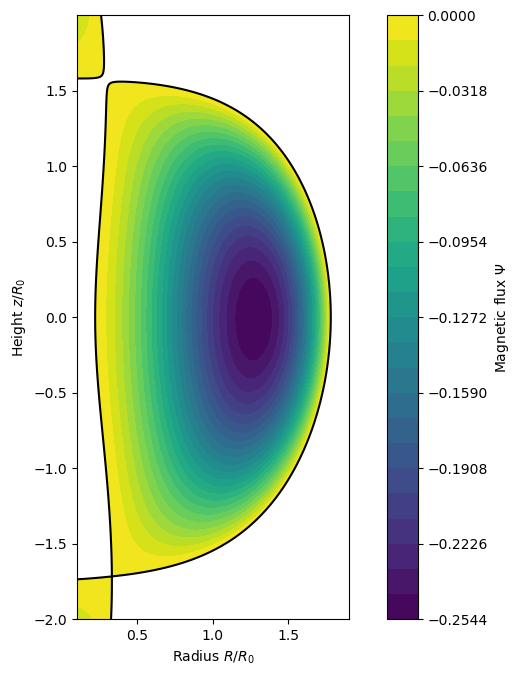

In [1]:
from plasmaboundaries import NSTX_single_null

NSTX_single_null

NSTX_Bt0 = 0.3 * u.T
NSTX_R0 = 0.8 * u.m
NSTX_a0 = 0.64 * u.m
NSTX_I = 1 * u.MA
from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium

params = {"aspect_ratio": 0.32, "A": -0.155, "elongation": 1.7, "triangularity": 0.33}
eq = SymbolicEquilibrium(
    **NSTX_single_null,
    B0=NSTX_Bt0.si.value,  # TODO handle quantity input
    config="single-null"
)
rminmaxstep = (
    0.1,
    1.9,
    0.001,
)  # these definitely, unfortunately, need to be moved into SymbolicEquilibrium
zminmaxstep = (-2, 2, 0.001)
eq.plot(rminmaxstep=rminmaxstep, zminmaxstep=zminmaxstep);

## `FluxSurface`

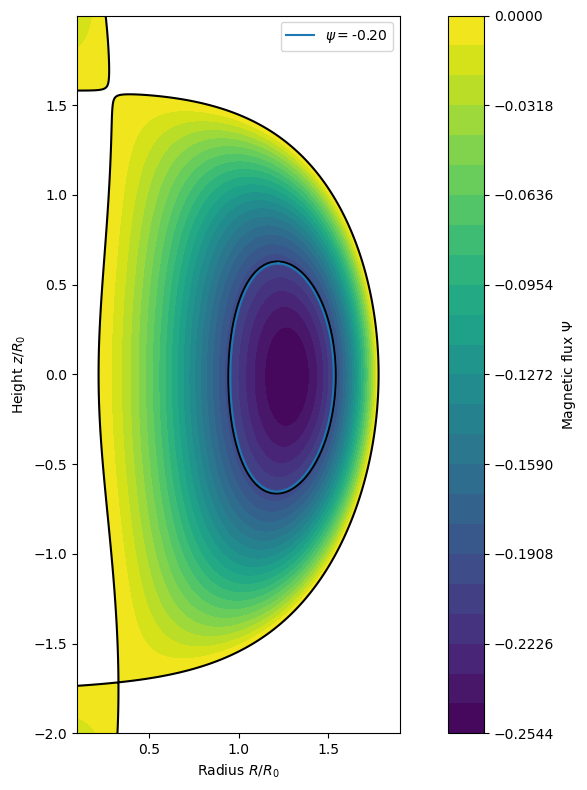

In [2]:
ax = eq.plot(rminmaxstep=rminmaxstep, zminmaxstep=zminmaxstep)
flux_surface = eq.get_flux_surface(
    psi_value=-0.2,
    # TODO allow either psi_value or rho_value
    rminmaxstep=rminmaxstep,
    zminmaxstep=zminmaxstep,
)  # TODO call this by effective_radius
flux_surface.plot(ax, n=True)
plt.tight_layout()
# plt.savefig("/home/dominik/Writing/blog/images/fluxsurface.png")

## Define particles in our simulation

In [3]:
import astropy.units as u
import numpy as np

from plasmapy.particles import IonizationStateCollection

all_species = IonizationStateCollection(
    {
        "H": [0, 1],
        #      "D": [0, 1],   raises ParticleError, why?
        "C": [0, 0, 0, 0, 0, 0, 1],
    },
    n0=1e20 * u.m ** -3,
    abundances={"H": 1, "C": 0.08},
    T_e=10 * u.eV,
)

<IonizationStateCollection for: H, C>

In [4]:
import xarray

In [5]:
rho = np.linspace(0, 1, 50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

## Multiple flux surfaces - radial grid

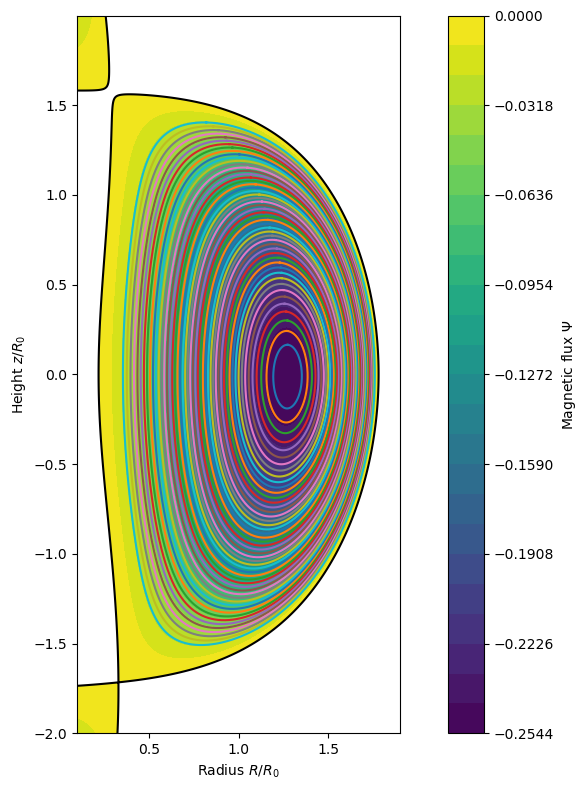

In [6]:
ax = eq.plot(rminmaxstep=rminmaxstep, zminmaxstep=zminmaxstep)
psi = np.linspace(-0.25, -0.023, 50)
surfaces = list(
    eq.get_multiple_flux_surfaces(psi, rminmaxstep=rminmaxstep, zminmaxstep=zminmaxstep)
)  # TODO handle multiple contours; just find closed ones
for fs in surfaces:
    fs.plot(ax)
ax.legend().remove()
plt.tight_layout()
# plt.savefig("/home/dominik/Writing/blog/images/fluxsurfacegrid.png")

## `FlowCalculator`

In [7]:
surfaces[0]

FluxSurface(R=array([1.27394038, 1.27334778, 1.27234833, ..., 1.27534667, 1.27434722,
       1.27394038]), Z=array([0.16445875, 0.16449647, 0.16453253, ..., 0.16434116, 0.16443274,
       0.16445875]), psi=-0.25, Brvals=array([-0.03875354, -0.03874911, -0.03873553, ..., -0.03875775,
       -0.03875654, -0.03875354]), Bzvals=array([0.00184877, 0.00121277, 0.00013945, ..., 0.0033579 , 0.00228559,
       0.00184877]), Bphivals=array([0.29949229, 0.29963168, 0.29986704, ..., 0.29916205, 0.29939668,
       0.29949229]), Bprimervals=array([0.07284229, 0.05522852, 0.02546492, ..., 0.11449098, 0.08492156,
       0.07284229]), Bprimezvals=array([0.22379685, 0.22300461, 0.22152707, ..., 0.22542649, 0.22430493,
       0.22379685]), GradRho2=array([0.03775374, 0.03766123, 0.03753947, ..., 0.0380429 , 0.03782904,
       0.03775374]))

In [8]:
rho_to_surface = {rho: surfaces[i] for i, rho in enumerate(rho)};

In [9]:
rho = psi / psi.min()  # TODO
# also TODO my rho is already normalized

array([1.        , 0.98146939, 0.96293878, 0.94440816, 0.92587755,
       0.90734694, 0.88881633, 0.87028571, 0.8517551 , 0.83322449,
       0.81469388, 0.79616327, 0.77763265, 0.75910204, 0.74057143,
       0.72204082, 0.7035102 , 0.68497959, 0.66644898, 0.64791837,
       0.62938776, 0.61085714, 0.59232653, 0.57379592, 0.55526531,
       0.53673469, 0.51820408, 0.49967347, 0.48114286, 0.46261224,
       0.44408163, 0.42555102, 0.40702041, 0.3884898 , 0.36995918,
       0.35142857, 0.33289796, 0.31436735, 0.29583673, 0.27730612,
       0.25877551, 0.2402449 , 0.22171429, 0.20318367, 0.18465306,
       0.16612245, 0.14759184, 0.12906122, 0.11053061, 0.092     ])

In [10]:
import jax.numpy as jnp

In [11]:
from jax import grad, vmap

In [12]:
rhoj = jnp.array(rho)
T0 = 10  # * u.eV
Ta = 0  # * u.eV


def T_i_func(rho, T0=T0, Ta=Ta):
    T_i = (T0 - Ta) * (
        1 - rho ** 2
    ) - Ta  # .to(u.K, equivalencies = u.temperature_energy())
    return T_i


T_i = T_i_func(rhoj)
T_e = T_i
ne_0 = 1e20  # * u.m**-3
ne_a = 1e18  # * u.m**-3


def n_e_func(rho, ne_0=ne_0, ne_a=ne_a):
    n_e = (ne_0 - ne_a) * (1 - rho ** 2) ** 0.5 + ne_a
    return n_e


n_e = n_e_func(rhoj)
n_i = n_e  # TODO
n_C6 = np.full_like(n_e, 1e19)  # * u.m**-3)

array([1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19,
       1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19,
       1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19,
       1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19,
       1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19,
       1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19, 1.e+19,
       1.e+19, 1.e+19], dtype=float32)

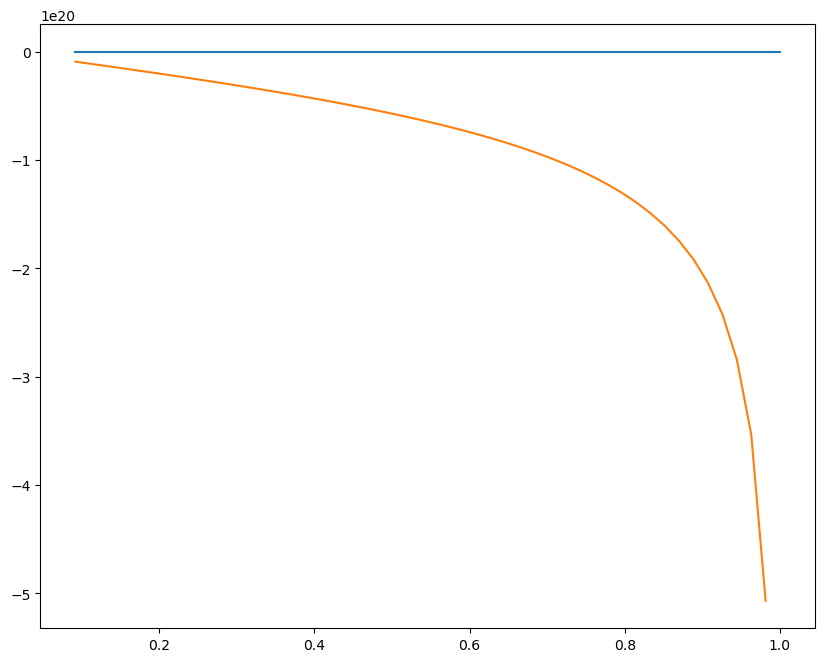

In [13]:
dTi = vmap(grad(T_i_func))(rho)
dn_e = vmap(grad(n_e_func))(rho)
plt.plot(rho, dTi)
plt.plot(rho, dn_e)

In [14]:
import xarray

dataset_H1 = xarray.Dataset(
    {
        "T": ("psi", T_i),
        "gradT": ("psi", dTi),
        "n": ("psi", n_e),
        "gradn": ("psi", dn_e),
    },
    coords={"psi": psi, "particle": "H 1+"},
    attrs={
        "T unit": u.eV,
        "n unit": u.m ** -3,
        "gradT unit": u.eV / u.m,
        "gradn unit": u.m ** -3 / u.m,
    },
)

dataset_C6 = xarray.Dataset(
    {
        "T": ("psi", T_i),
        "gradT": ("psi", dTi),
        "n": ("psi", n_C6),
        "gradn": ("psi", jnp.zeros_like(n_C6)),
    },
    coords={"psi": psi, "particle": "C 6+"},
    attrs={
        "T unit": u.eV,
        "n unit": u.m ** -3,
        "gradT unit": u.eV / u.m,
        "gradn unit": u.m ** -3 / u.m,
    },
)
dataset_e = xarray.Dataset(
    {
        "T": ("psi", T_e),
        "gradT": ("psi", dTi),
        "n": ("psi", n_e),
        "gradn": ("psi", dn_e),
    },
    coords={"psi": psi, "particle": "e-"},
    attrs={
        "T unit": u.eV,
        "n unit": u.m ** -3,
        "gradT unit": u.eV / u.m,
        "gradn unit": u.m ** -3 / u.m,
    },
)

dataset = xarray.concat([dataset_H1, dataset_C6, dataset_e], dim="particle")

<xarray.Dataset>
Dimensions:   (particle: 3, psi: 50)
Coordinates:
  * psi       (psi) float64 -0.25 -0.2454 -0.2407 ... -0.03227 -0.02763 -0.023
  * particle  (particle) <U4 'H 1+' 'C 6+' 'e-'
Data variables:
    T         (particle, psi) float32 0.0 0.3672 0.7275 ... 9.833 9.878 9.915
    gradT     (particle, psi) float32 -20.0 -19.63 -19.26 ... -2.211 -1.84
    n         (particle, psi) float32 1e+18 1.997e+19 ... 9.939e+19 9.958e+19
    gradn     (particle, psi) float32 -inf -5.071e+20 ... -1.101e+19 -9.147e+18
Attributes:
    T unit:      eV
    n unit:      1 / m3
    gradT unit:  eV / m
    gradn unit:  1 / m4

In [23]:
from tqdm import auto as tqdm

from plasmapy.transport.flows import FlowCalculator

fcs = []
import warnings

N = dataset.psi.size
assert N == len(surfaces)
for ρ, surface in tqdm.tqdm(zip(dataset.psi, surfaces), total=N):
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            fcs.append(FlowCalculator.from_xarray_surface(dataset.sel(psi=ρ), surface))
    except Exception as e:
        display(e)

  0%|          | 0/50 [00:00<?, ?it/s]

e- is not currently handled: The particle e- is not an element, so this attribute is not available.


plasmapy.utils.exceptions.PhysicsError('You cannot have a collision for zero velocity!')

e- is not currently handled: The particle e- is not an element, so this attribute is not available.
e- is not currently handled: The particle e- is not an element, so this attribute is not available.
e- is not currently handled: The particle e- is not an element, so this attribute is not available.
e- is not currently handled: The particle e- is not an element, so this attribute is not available.
e- is not currently handled: The particle e- is not an element, so this attribute is not available.
e- is not currently handled: The particle e- is not an element, so this attribute is not available.
e- is not currently handled: The particle e- is not an element, so this attribute is not available.
e- is not currently handled: The particle e- is not an element, so this attribute is not available.
e- is not currently handled: The particle e- is not an element, so this attribute is not available.
e- is not currently handled: The particle e- is not an element, so this attribute is not available.


In [24]:
results = xarray.concat([fc.to_dataset() for fc in tqdm.tqdm(fcs)], dim="psi")

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<xarray.Dataset>
Dimensions:                (particle: 2, psi: 49)
Coordinates:
  * particle               (particle) <U4 'H 1+' 'C 6+'
  * psi                    (psi) float64 -0.2454 -0.2407 ... -0.02763 -0.023
Data variables:
    total_particle_flux    (psi, particle) float64 -3.143e+23 ... -3.043e+20
    total_heat_flux        (psi, particle) float64 -7.282e+04 ... -1.191e+03
    BP_particle_flux       (psi, particle) float64 -3.139e+23 ... -3.054e+20
    BP_heat_flux           (psi, particle) float64 -7.08e+04 ... -727.4
    CL_particle_flux       (psi, particle) float64 -2.677e+20 ... 8.512e+17
    CL_heat_flux           (psi, particle) float64 -1.477e+03 ... -338.4
    PS_particle_flux       (psi, particle) float64 -9.796e+19 ... 3.152e+17
    PS_heat_flux           (psi, particle) float64 -540.6 -462.2 ... -125.3
    diffusion_coefficient  (psi, particle) float64 -619.7 inf ... 6.064 inf
    thermal_conductivity   (psi, particle) float64 -0.3197 -0.4445 ... -0.05578
    bootstrap_current      (psi) float64 -201.7 -133.6 -51.34 ... 87.9 74.34

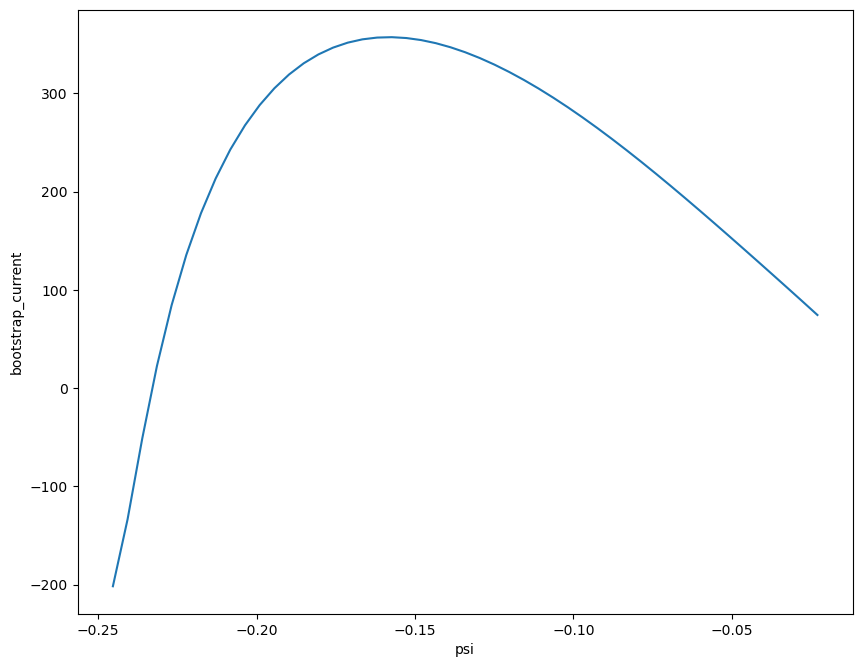

In [25]:
results.bootstrap_current.plot.line()

In [26]:
results.thermal_conductivity

<xarray.DataArray 'thermal_conductivity' (psi: 49, particle: 2)>
array([[-0.31968879, -0.44454271],
       [-0.36477003, -0.57355545],
       [-0.3676321 , -0.59701006],
       [-0.35964151, -0.57988965],
       [-0.34952171, -0.54942116],
       [-0.33971755, -0.5160721 ],
       [-0.33082451, -0.48377071],
       [-0.32289716, -0.45384819],
       [-0.31580964, -0.42652291],
       [-0.30943368, -0.40169814],
       [-0.30367551, -0.37925466],
       [-0.29841403, -0.35885932],
       [-0.29357803, -0.34030328],
       [-0.2891101 , -0.32339525],
       [-0.28491981, -0.30781937],
       [-0.28098576, -0.29348419],
       [-0.27727465, -0.28025612],
       [-0.27375521, -0.26800142],
       [-0.27037632, -0.25653564],
       [-0.26714832, -0.24586132],
...
       [-0.23908435, -0.16608361],
       [-0.2364614 , -0.15981246],
       [-0.23384424, -0.15375385],
       [-0.2312083 , -0.14781966],
       [-0.22855831, -0.1420441 ],
       [-0.2258723 , -0.13635038],
       [-0.22314825, -0.1307575 ],
       [-0.22037169, -0.1252349 ],
       [-0.21752557, -0.11974171],
       [-0.21459435, -0.1142596 ],
       [-0.21155992, -0.10876844],
       [-0.20840089, -0.10325781],
       [-0.20508775, -0.09768254],
       [-0.20158938, -0.09204803],
       [-0.19786292, -0.08630129],
       [-0.19385832, -0.08044787],
       [-0.18951197, -0.07447675],
       [-0.18473954, -0.06835531],
       [-0.17943566, -0.06211938],
       [-0.17345555, -0.05578252]])
Coordinates:
  * particle  (particle) <U4 'H 1+' 'C 6+'
  * psi       (psi) float64 -0.2454 -0.2407 -0.2361 ... -0.03227 -0.02763 -0.023

In [27]:
results.diffusion_coefficient.sel(particle="C 6+")

<xarray.DataArray 'diffusion_coefficient' (psi: 49)>
array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])
Coordinates:
    particle  <U4 'C 6+'
  * psi       (psi) float64 -0.2454 -0.2407 -0.2361 ... -0.03227 -0.02763 -0.023

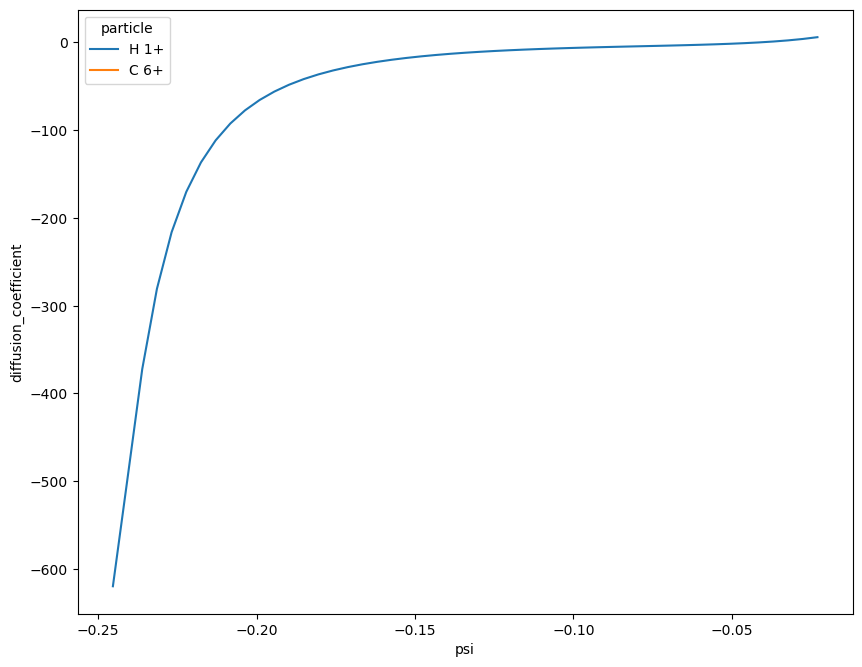

In [28]:
results.diffusion_coefficient.plot.line(x="psi")

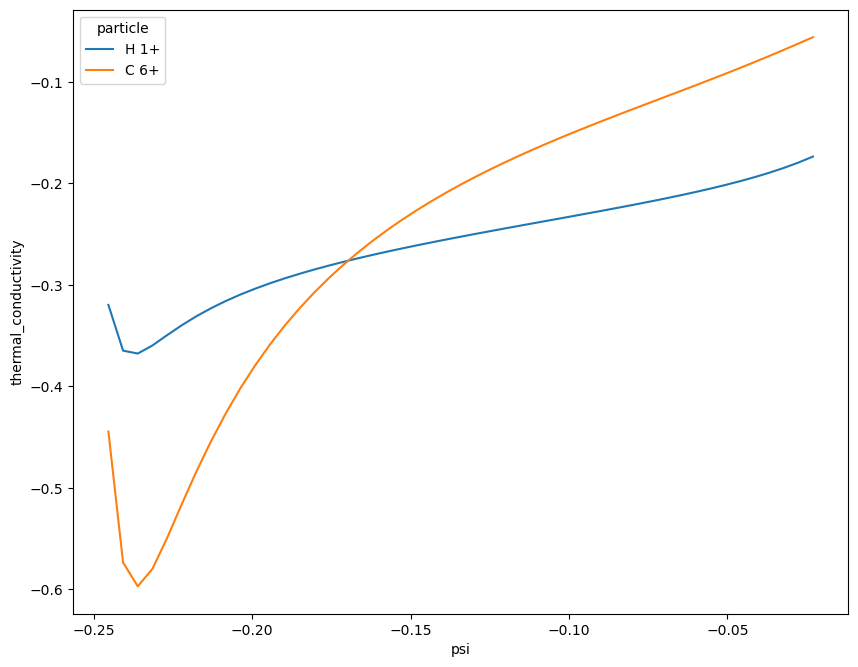

In [29]:
results.thermal_conductivity.plot.line(x="psi")

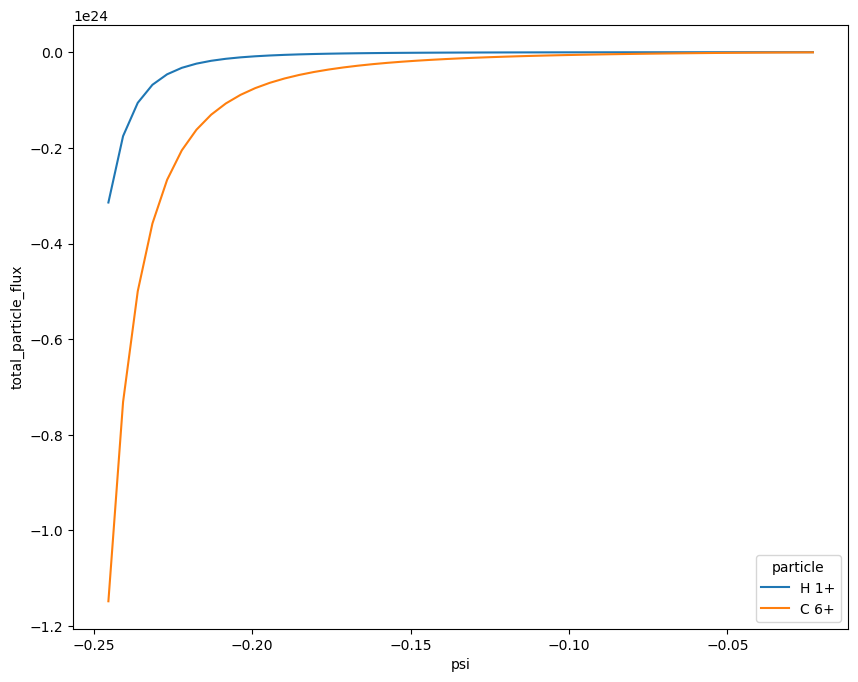

In [35]:
results.total_particle_flux.plot.line(x="psi")

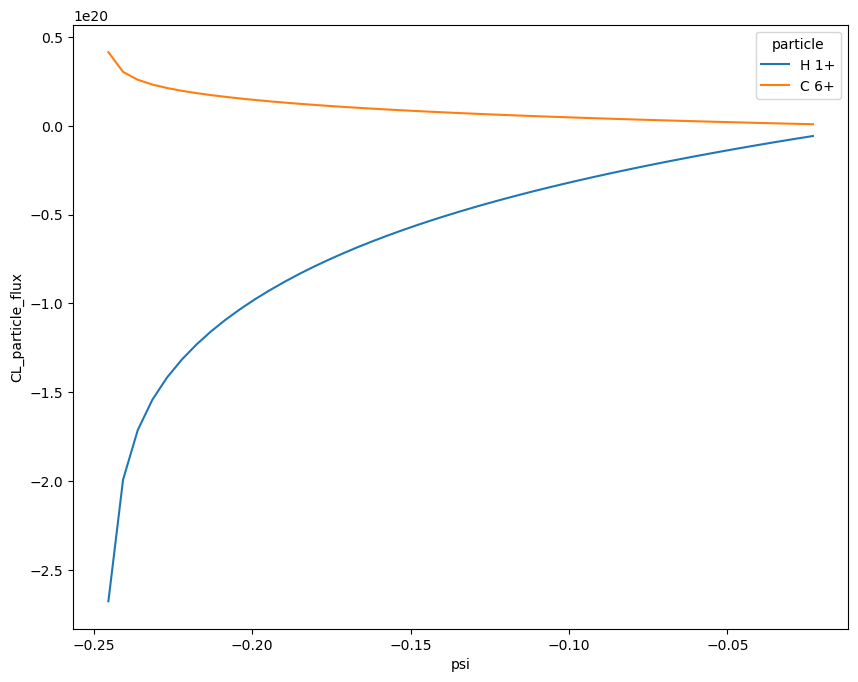

In [31]:
results.CL_particle_flux.plot.line(x="psi")

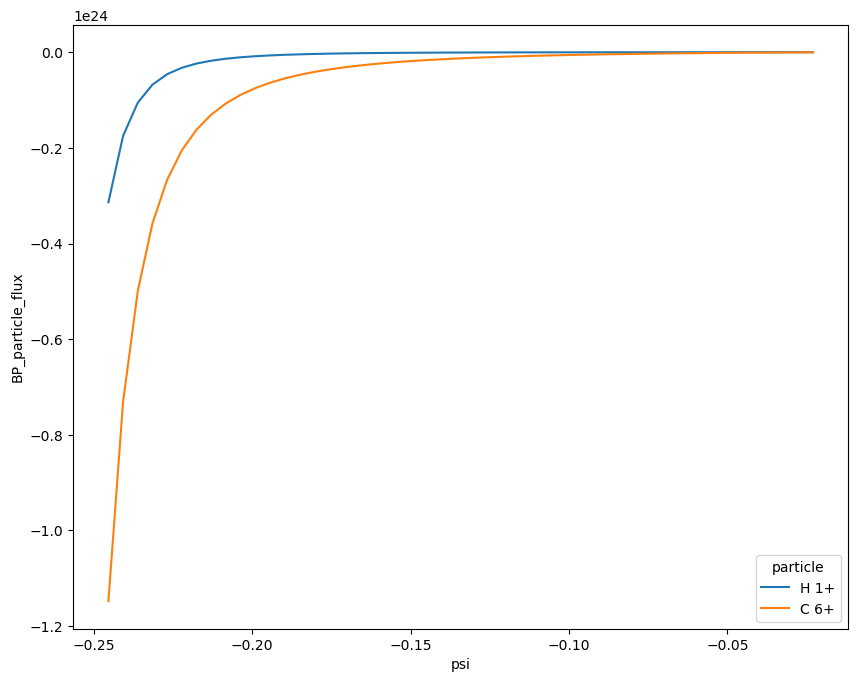

In [32]:
results.BP_particle_flux.plot.line(x="psi")

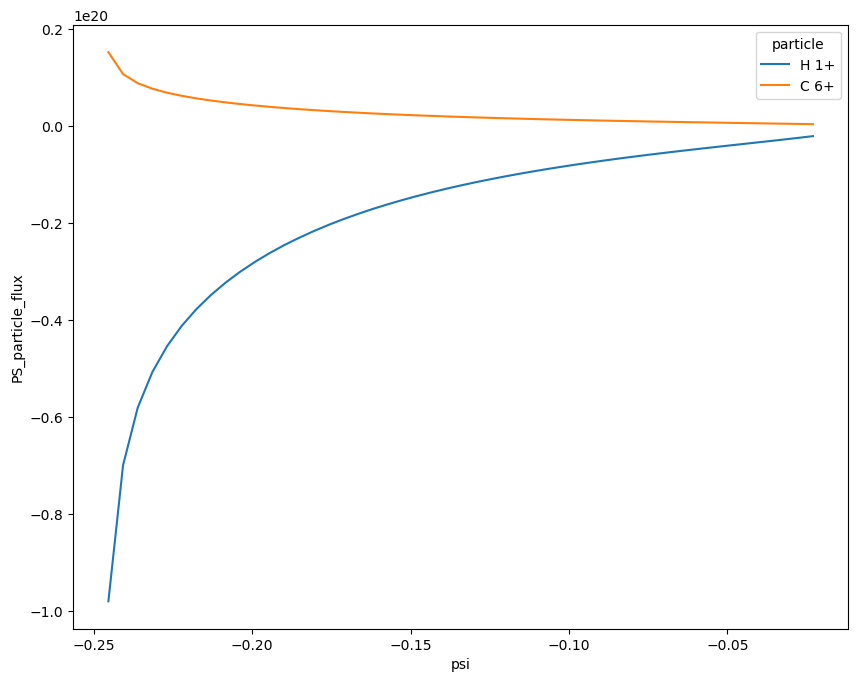

In [36]:
results.PS_particle_flux.plot.line(x="psi")

In [37]:
full_out = xarray.merge([dataset, results])

<xarray.Dataset>
Dimensions:                (particle: 3, psi: 50)
Coordinates:
  * particle               (particle) <U4 'C 6+' 'H 1+' 'e-'
  * psi                    (psi) float64 -0.25 -0.2454 ... -0.02763 -0.023
Data variables: (12/15)
    T                      (particle, psi) float32 0.0 0.3672 ... 9.878 9.915
    gradT                  (particle, psi) float32 -20.0 -19.63 ... -2.211 -1.84
    n                      (particle, psi) float32 1e+19 1e+19 ... 9.958e+19
    gradn                  (particle, psi) float32 0.0 0.0 ... -9.147e+18
    total_particle_flux    (psi, particle) float64 nan nan nan ... 5.547e+19 nan
    total_heat_flux        (psi, particle) float64 nan nan ... -3.704e+03 nan
    ...                     ...
    CL_heat_flux           (psi, particle) float64 nan nan ... -1.571e+03 nan
    PS_particle_flux       (psi, particle) float64 nan nan ... -2.144e+18 nan
    PS_heat_flux           (psi, particle) float64 nan nan nan ... -581.7 nan
    diffusion_coefficient  (psi, particle) float64 nan nan nan ... inf 6.064 nan
    thermal_conductivity   (psi, particle) float64 nan nan nan ... -0.1735 nan
    bootstrap_current      (psi) float64 nan -201.7 -133.6 ... 101.3 87.9 74.34